# Robo Advisors and Systematic Trading Final Project

In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import MonthEnd
import statsmodels.formula.api as smf
pd.options.mode.chained_assignment = None
import requests
import matplotlib.pyplot as plt
from math import floor
from termcolor import colored as cl
import datetime as dt
import pandas_datareader as pdr
import seaborn as sns
import matplotlib.pyplot as plt
import bs4 as bs
import requests
from IPython.display import clear_output
from scipy.stats import mstats
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV, validation_curve, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
import pickle
import os
import yfinance as yfin
from sklearn.model_selection import GridSearchCV
sns.set()

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20,10)

## Stock Trading using Multiple Technical Indicators 

In [2]:
df=pd.read_html('https://en.wikipedia.org/wiki/Nasdaq-100')[4]
tickers = df.Ticker.to_list()
stocks = pd.DataFrame()
data = pd.DataFrame()

for i in tickers:
    print(i)
    data = yfin.download(i, start = dt.datetime(2009,1,1), end = dt.date.today())
    data['ticker'] = i
    stocks = stocks.append(data)

stocks['returns'] = stocks.groupby('ticker')['Adj Close'].pct_change()        
stocks.head()

ATVI
[*********************100%***********************]  1 of 1 completed
ADBE


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
ADP


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
ABNB
[*********************100%***********************]  1 of 1 completed
ALGN


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)
/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
GOOGL


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
GOOG


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
AMZN


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
AMD


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
AEP


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
AMGN


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
ADI


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
ANSS


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
AAPL


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
AMAT


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
ASML


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
AZN


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
TEAM


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
ADSK


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
BKR


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
BIIB


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
BKNG


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
AVGO


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
CDNS


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
CHTR


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
CTAS


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
CSCO


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
CTSH


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
CMCSA


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
CEG
[*********************100%***********************]  1 of 1 completed
CPRT


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)
/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
CSGP


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
COST


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
CRWD
[*********************100%***********************]  1 of 1 completed


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)
/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


CSX
[*********************100%***********************]  1 of 1 completed
DDOG
[*********************100%***********************]  1 of 1 completed


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)
/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


DXCM
[*********************100%***********************]  1 of 1 completed
FANG


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
DLTR


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
EBAY


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
EA


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
ENPH


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
EXC


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
FAST


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
FISV


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
FTNT


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
GILD


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
GFS
[*********************100%***********************]  1 of 1 completed
HON


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)
/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
IDXX


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
ILMN


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
INTC


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
INTU


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
ISRG


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
JD


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
KDP


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
KLAC


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
KHC


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
LRCX


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
LCID
[*********************100%***********************]  1 of 1 completed


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)
/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


LULU
[*********************100%***********************]  1 of 1 completed
MAR


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
MRVL


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
MELI


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
META


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
MCHP


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
MU


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
MSFT


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
MRNA


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
MDLZ


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
MNST


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
NFLX


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
NVDA


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
NXPI


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
ORLY


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
ODFL


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
PCAR


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
PANW


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
PAYX


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
PYPL


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
PDD


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
PEP


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
QCOM


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
REGN


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
RIVN


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
ROST


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
SGEN


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
SIRI


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
SBUX


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
SNPS


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
TMUS


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
TSLA


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
TXN


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
VRSK


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
VRTX


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
WBA


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
WBD


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
WDAY


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
XEL


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
ZM


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed
ZS


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


[*********************100%***********************]  1 of 1 completed


/var/folders/ls/xfrys8px1lg5bc_1jdqp10ww0000gn/T/ipykernel_5869/2901528479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(data)


,Open,High,Low,Close,Adj Close,Volume,ticker,returns
Date,,,,,,,,
2009-01-02,8.78,9.16,8.51,9.12,8.085549,8077100,ATVI,NaN
2009-01-05,9.00,9.07,8.62,8.75,7.757518,8074400,ATVI,-0.040570
2009-01-06,8.81,8.89,8.14,8.18,7.252170,24157500,ATVI,-0.065143
2009-01-07,8.20,9.42,8.18,9.08,8.050085,44055500,ATVI,0.110024
2009-01-08,9.25,9.62,8.86,9.26,8.209670,22458800,ATVI,0.019824


## Simple Moving Average (Adj. Close)

In [3]:
stocks['SMA_10'] = stocks.groupby('ticker')['Adj Close'].transform(lambda x: x.rolling(window = 10).mean())
stocks['SMA_30'] = stocks.groupby('ticker')['Adj Close'].transform(lambda x: x.rolling(window = 30).mean())

stocks['SMA_Indicator_Position'] = np.where(stocks['SMA_10'] > stocks['SMA_30'],1.0,(np.where(stocks['SMA_10']< stocks['SMA_30'],-1.0,0.0)))
stocks['SMA_Returns'] = stocks.groupby('ticker')['returns'].shift(-1) * stocks['SMA_Indicator_Position']

### Plot

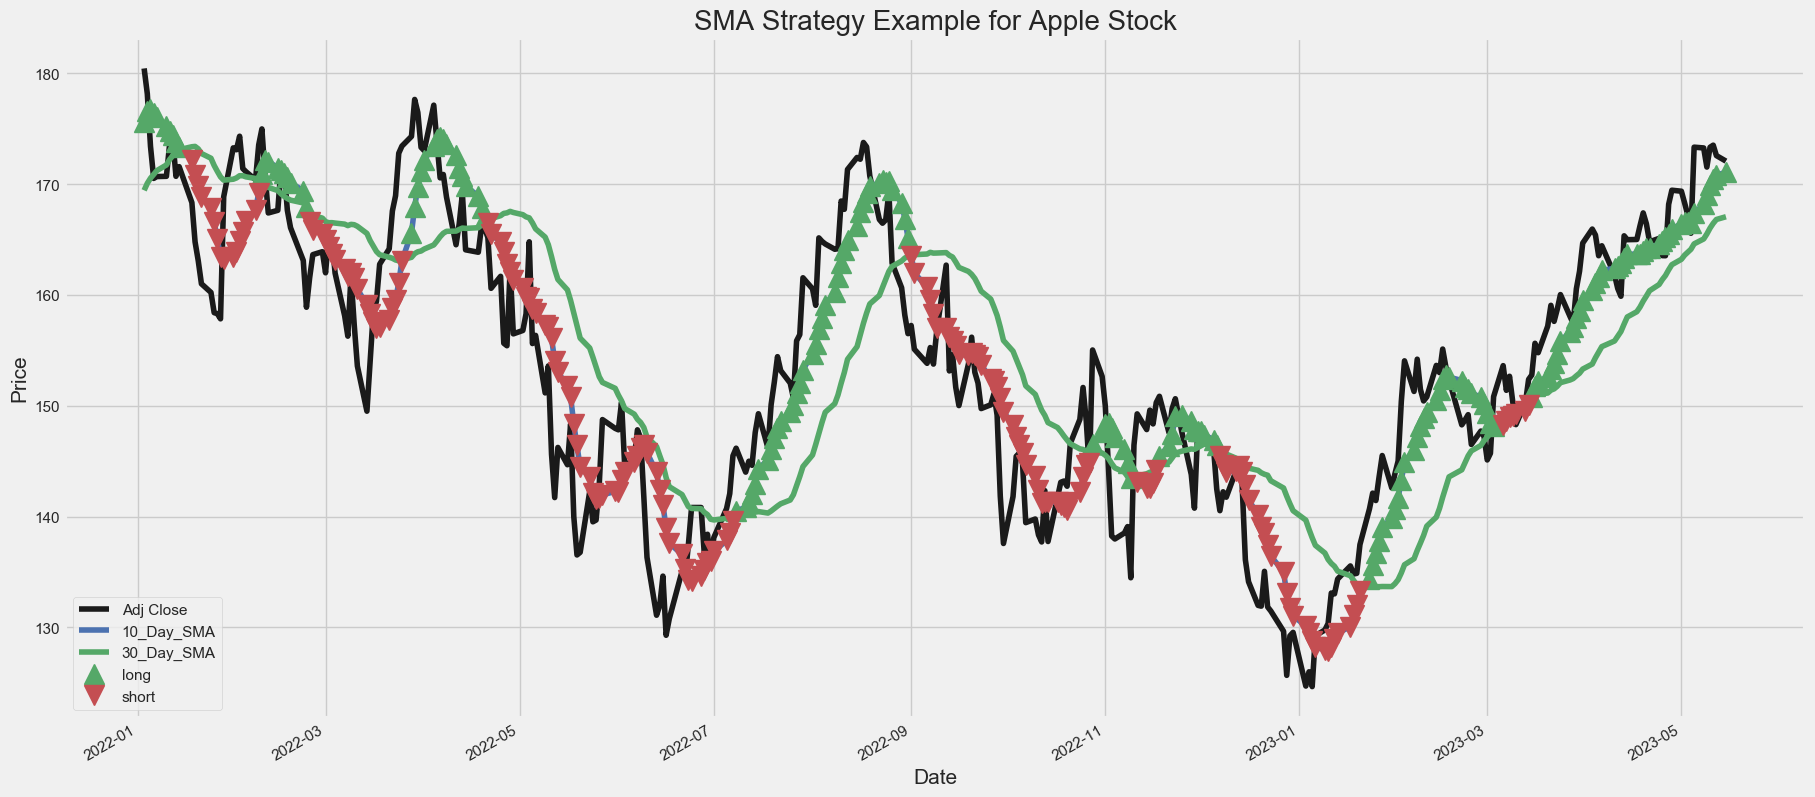

In [4]:
aapl = stocks[stocks['ticker'] == 'AAPL']
aapl = aapl[aapl.index > '2022-01-01']
plt.figure(figsize = (20,10))

aapl['Adj Close'].plot(color = 'k', label= 'Adj Close') 
aapl['SMA_10'].plot(color = 'b',label = '10_Day_SMA') 
aapl['SMA_30'].plot(color = 'g', label = '30_Day_SMA')

plt.plot(aapl[aapl['SMA_Indicator_Position'] == 1].index, 
         aapl['SMA_10'][aapl['SMA_Indicator_Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'long')

plt.plot(aapl[aapl['SMA_Indicator_Position'] == -1].index, 
         aapl['SMA_10'][aapl['SMA_Indicator_Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'short')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('SMA Strategy Example for Apple Stock', fontsize = 20)
plt.legend()
plt.show()

## Simple Moving Average (Volume)

In [5]:
stocks['SMA_Volume_10'] = stocks.groupby('ticker')['Volume'].transform(lambda x: x.rolling(window = 10).mean())
stocks['SMA_Volume_30'] = stocks.groupby('ticker')['Volume'].transform(lambda x: x.rolling(window = 30).mean())
    
stocks['SMA_Vol_Indicator_Position'] = np.where(stocks['SMA_Volume_10'] > stocks['SMA_Volume_30'],1.0,(np.where(stocks['SMA_Volume_10']< stocks['SMA_Volume_30'],-1.0,0.0)))
stocks['SMA_Vol_Returns'] = stocks.groupby('ticker')['returns'].shift(-1) * stocks['SMA_Vol_Indicator_Position']
    

### Plot

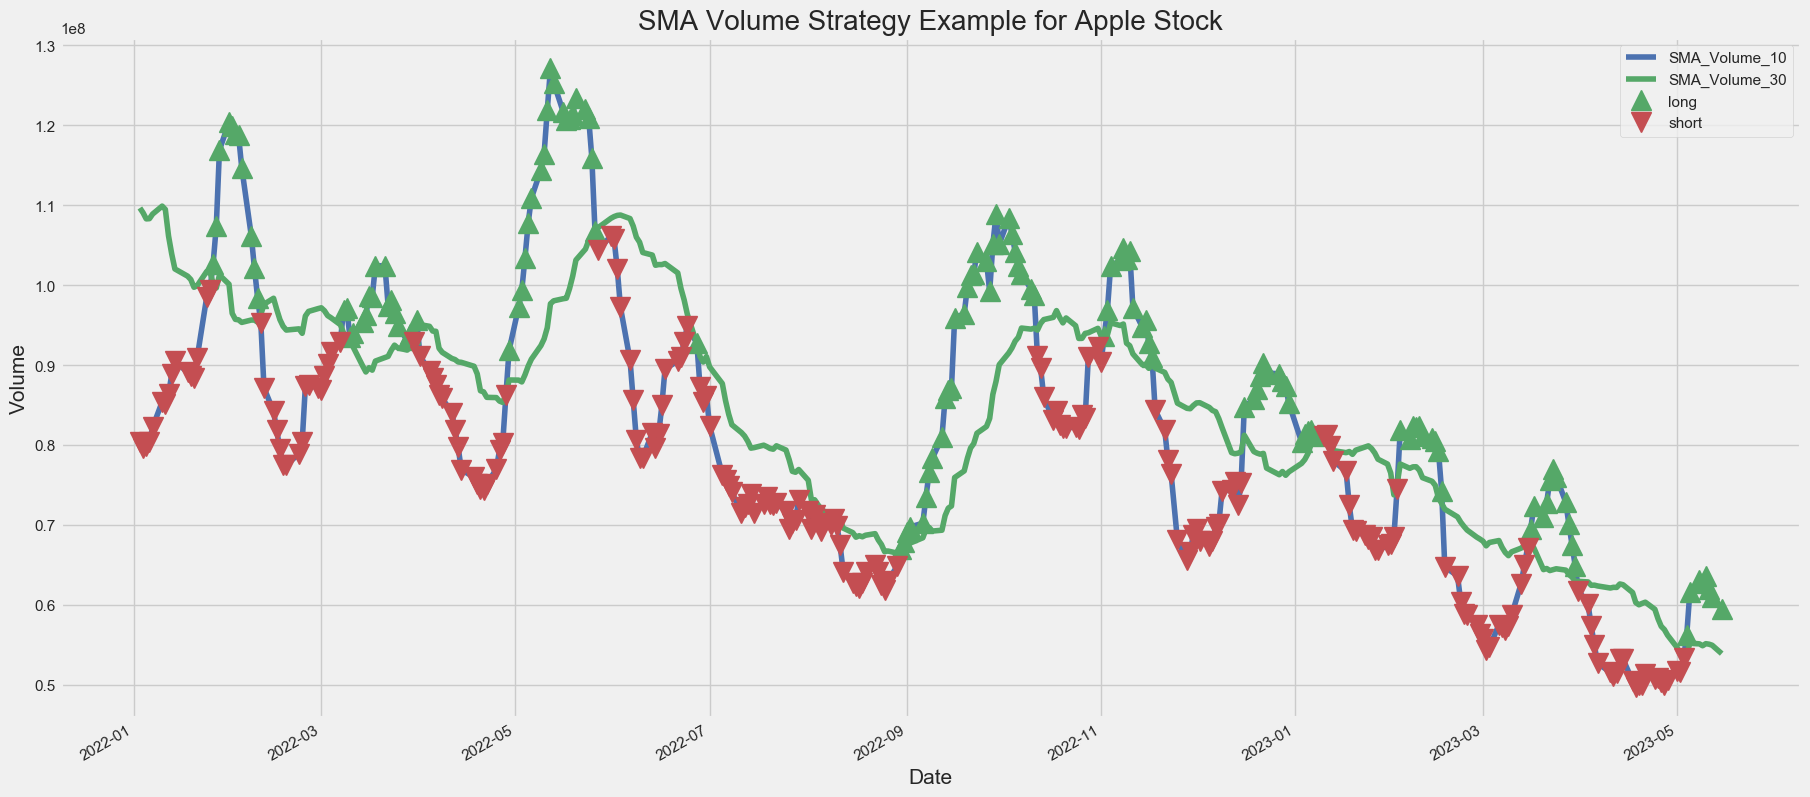

In [6]:
aapl = stocks[stocks['ticker'] == 'AAPL']
aapl = aapl[aapl.index > '2022-01-01']
plt.figure(figsize = (20,10))

aapl['SMA_Volume_10'].plot(color = 'b',label = 'SMA_Volume_10') 
aapl['SMA_Volume_30'].plot(color = 'g', label = 'SMA_Volume_30')

plt.plot(aapl[aapl['SMA_Vol_Indicator_Position'] == 1].index, 
         aapl['SMA_Volume_10'][aapl['SMA_Vol_Indicator_Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'long')

plt.plot(aapl[aapl['SMA_Vol_Indicator_Position'] == -1].index, 
         aapl['SMA_Volume_10'][aapl['SMA_Vol_Indicator_Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'short')
plt.ylabel('Volume', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('SMA Volume Strategy Example for Apple Stock', fontsize = 20)
plt.legend()
plt.show()

# Breakout High-Low 30

In [7]:
stocks['high_30'] = stocks.groupby('ticker')['Adj Close'].transform(lambda x: x.rolling(window = 30).max())
stocks['low_30'] = stocks.groupby('ticker')['Adj Close'].transform(lambda x: x.rolling(window = 30).min())

stocks['Breakout_Action'] = np.where(stocks['Adj Close'] > stocks['high_30'].shift(1),1.0,(np.where(stocks['Adj Close']< stocks['low_30'].shift(1),-1.0,0.0)))
stocks['Breakout_Position'] = 0
stocks['Breakout_Position'] = np.where(stocks['Breakout_Action'] != 0, stocks['Breakout_Action'], stocks['Breakout_Position'].shift(1))
stocks['Breakout_Returns'] = stocks.groupby('ticker')['returns'].shift(-1) * stocks['Breakout_Position']



### Plot

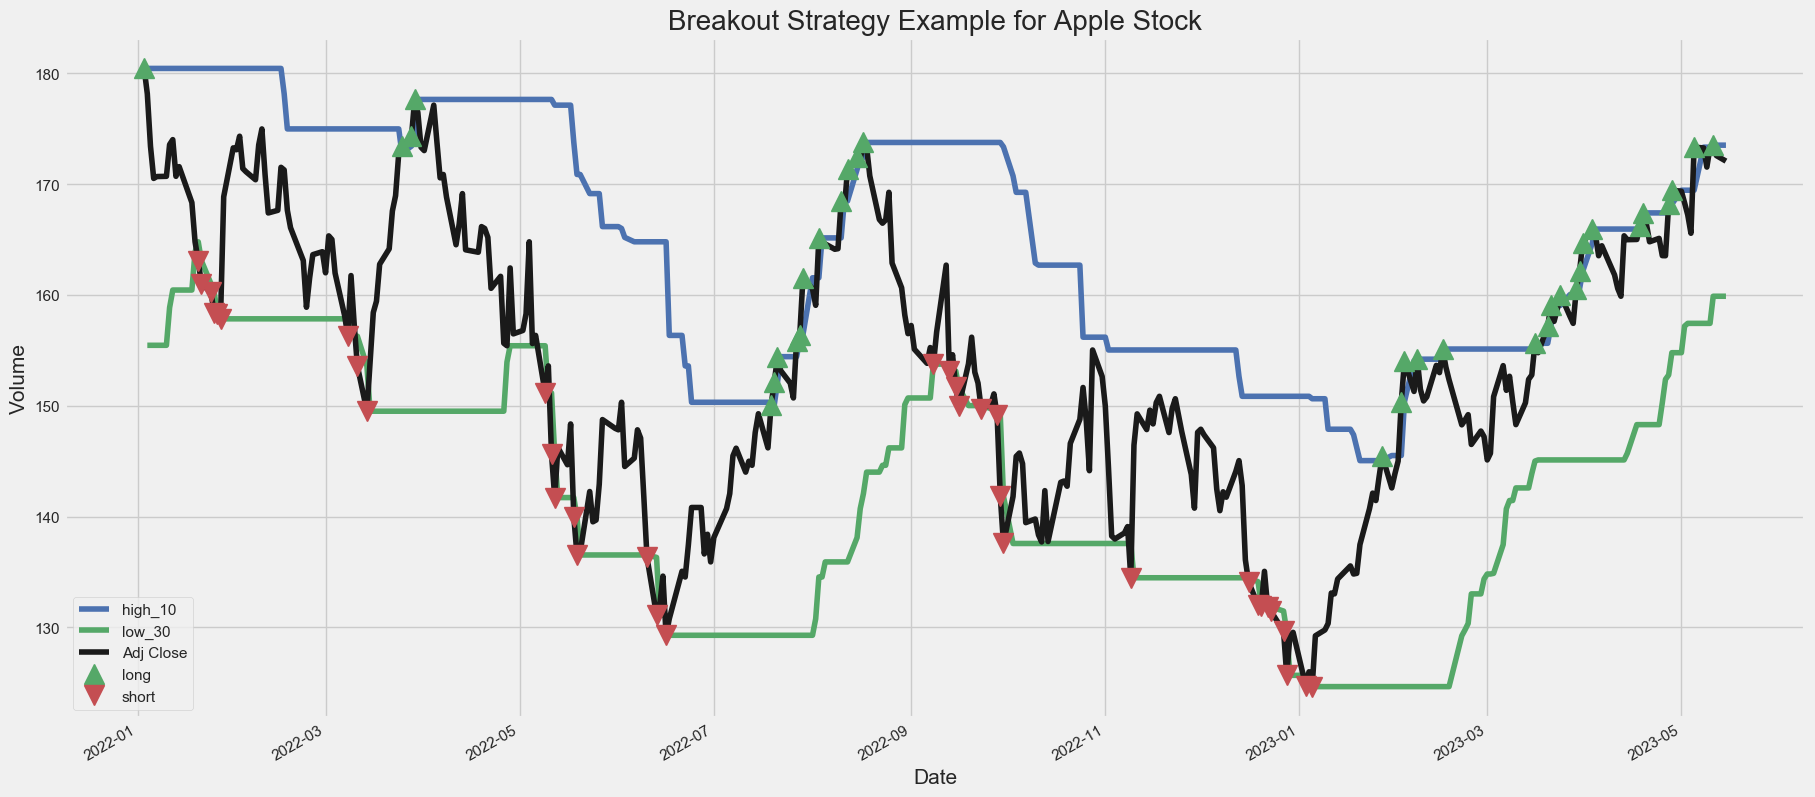

In [8]:
aapl = stocks[stocks['ticker'] == 'AAPL']
aapl = aapl[aapl.index > '2022-01-01']
plt.figure(figsize = (20,10))

aapl['high_30'].shift(1).plot(color = 'b',label = 'high_10') 
aapl['low_30'].shift(1).plot(color = 'g', label = 'low_30')
aapl['Adj Close'].plot(color = 'k', label = 'Adj Close')

plt.plot(aapl[aapl['Breakout_Position'] == 1].index, 
         aapl['Adj Close'][aapl['Breakout_Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'long')

plt.plot(aapl[aapl['Breakout_Position'] == -1].index, 
         aapl['Adj Close'][aapl['Breakout_Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'short')
plt.ylabel('Volume', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Breakout Strategy Example for Apple Stock', fontsize = 20)
plt.legend()
plt.show()

## Average True Range (ATR)

In [9]:
stocks['TR'] = np.maximum((stocks['High'] - stocks['Low']), 
                     np.maximum(abs(stocks['High'] - stocks['Adj Close'].shift(1)), 
                     abs(stocks['Low'] - stocks['Adj Close'].shift(1))))
stocks['ATR_10'] = stocks.groupby('ticker')['TR'].transform(lambda x: x.rolling(window = 10).mean())
stocks['ATR_30'] = stocks.groupby('ticker')['TR'].transform(lambda x: x.rolling(window = 30).mean())


stocks['ATR_Indicator_Position'] = np.where(stocks['ATR_10'] > stocks['ATR_30'],1.0,(np.where(stocks['ATR_10']< stocks['ATR_30'],-1.0,0.0)))
stocks['ATR_Returns'] = stocks.groupby('ticker')['returns'].shift(-1) * stocks['ATR_Indicator_Position']

### Plot

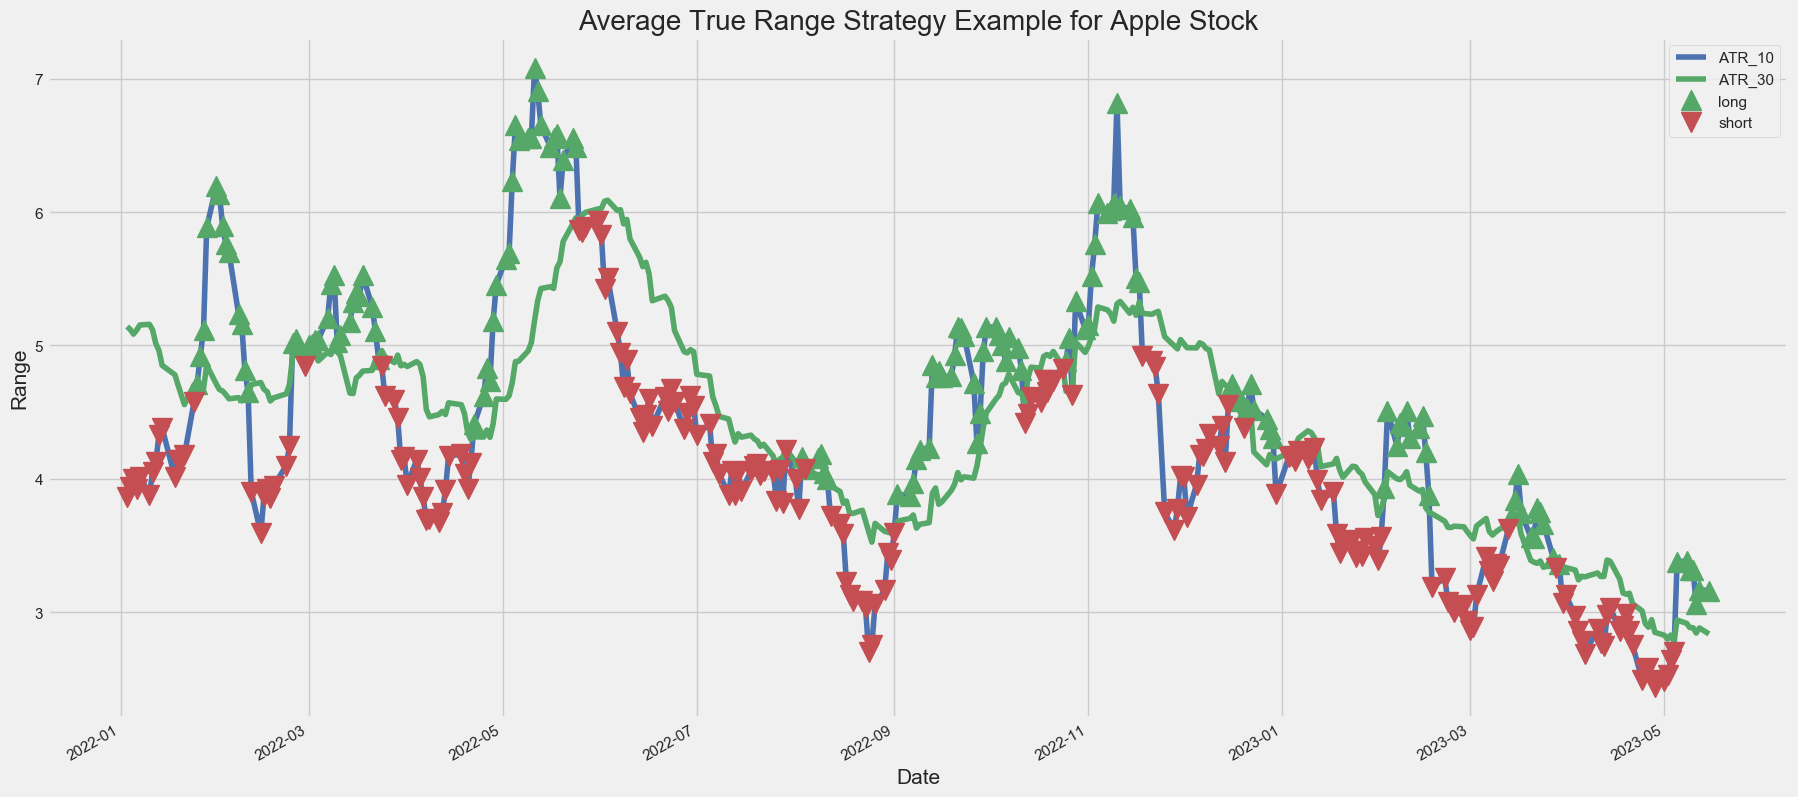

In [10]:
aapl = stocks[stocks['ticker'] == 'AAPL']
aapl = aapl[aapl.index > '2022-01-01']
plt.figure(figsize = (20,10))

aapl['ATR_10'].plot(color = 'b',label = 'ATR_10') 
aapl['ATR_30'].plot(color = 'g', label = 'ATR_30')

plt.plot(aapl[aapl['ATR_Indicator_Position'] == 1].index, 
         aapl['ATR_10'][aapl['ATR_Indicator_Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'long')

plt.plot(aapl[aapl['ATR_Indicator_Position'] == -1].index, 
         aapl['ATR_10'][aapl['ATR_Indicator_Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'short')
plt.ylabel('Range', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Average True Range Strategy Example for Apple Stock', fontsize = 20)
plt.legend()
plt.show()

## Moving Average Convergence Divergence (MACD)

In [11]:

stocks['10Day_EMA'] = stocks.groupby('ticker')['Adj Close'].transform(lambda x: x.ewm(span=10, adjust=False).mean())
stocks['30Day_EMA'] = stocks.groupby('ticker')['Adj Close'].transform(lambda x: x.ewm(span=30, adjust=False).mean())

stocks['MACD_Value'] = stocks['30Day_EMA'] - stocks['10Day_EMA']
stocks['MACD_Signal'] = stocks.groupby('ticker')['MACD_Value'].transform(lambda x: x.ewm(span=10, adjust=False).mean())

stocks['MACD_Signal_Action'] = np.where(stocks['MACD_Value'] > stocks['MACD_Signal'], 1.0,0.0)
stocks['MACD_Signal_Position'] = stocks['MACD_Signal_Action'].diff()
stocks['MACD_Returns'] = stocks.groupby('ticker')['returns'].shift(-1) * stocks['MACD_Signal_Position']



### Plot

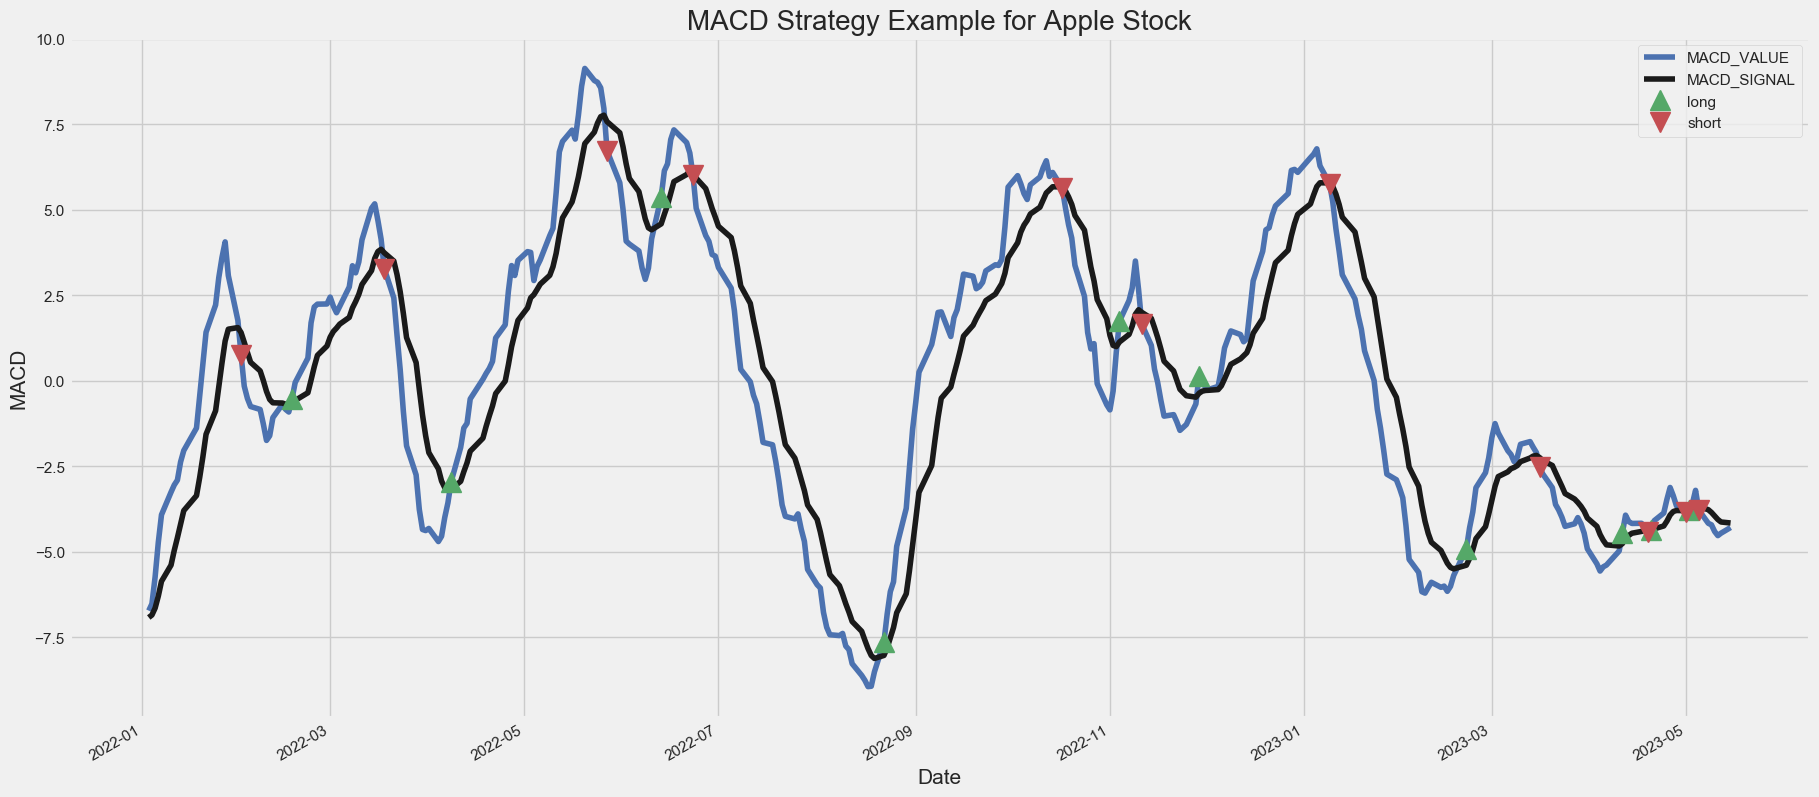

In [12]:
aapl = stocks[stocks['ticker'] == 'AAPL']
aapl = aapl[aapl.index > '2022-01-01']
plt.figure(figsize = (20,10))

aapl['MACD_Value'].plot(color = 'b', label= 'MACD_VALUE') 
aapl['MACD_Signal'].plot(color = 'k', label= 'MACD_SIGNAL') 


plt.plot(aapl[aapl['MACD_Signal_Position'] == 1].index, 
         aapl['MACD_Value'][aapl['MACD_Signal_Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'long')

plt.plot(aapl[aapl['MACD_Signal_Position'] == -1].index, 
         aapl['MACD_Value'][aapl['MACD_Signal_Position']  == -1], 
         'v', markersize = 15, color = 'r', label = 'short')
plt.ylabel('MACD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('MACD Strategy Example for Apple Stock', fontsize = 20)
plt.legend()
plt.show()

## Bollinger Bands

In [13]:
stocks['SMA_20'] = stocks.groupby('ticker')['Adj Close'].transform(lambda x: x.rolling(window = 20).mean())
stocks['SD_20'] = stocks.groupby('ticker')['Adj Close'].transform(lambda x: x.rolling(window=20).std())

stocks['upperband'] = stocks['SMA_20'] + 2*stocks['SD_20']
stocks['lowerband'] = stocks['SMA_20'] - 2*stocks['SD_20']

stocks['Bollinger_Signal_Action'] = np.where(stocks['lowerband'] > stocks['Adj Close'], 1.0,0.0)
stocks['Bollinger_Signal_Position'] = stocks['Bollinger_Signal_Action'].diff()
stocks['Bollinger_Returns'] = stocks.groupby('ticker')['returns'].shift(-1) * stocks['Bollinger_Signal_Position']

### Plot

<Figure size 2000x1000 with 0 Axes>

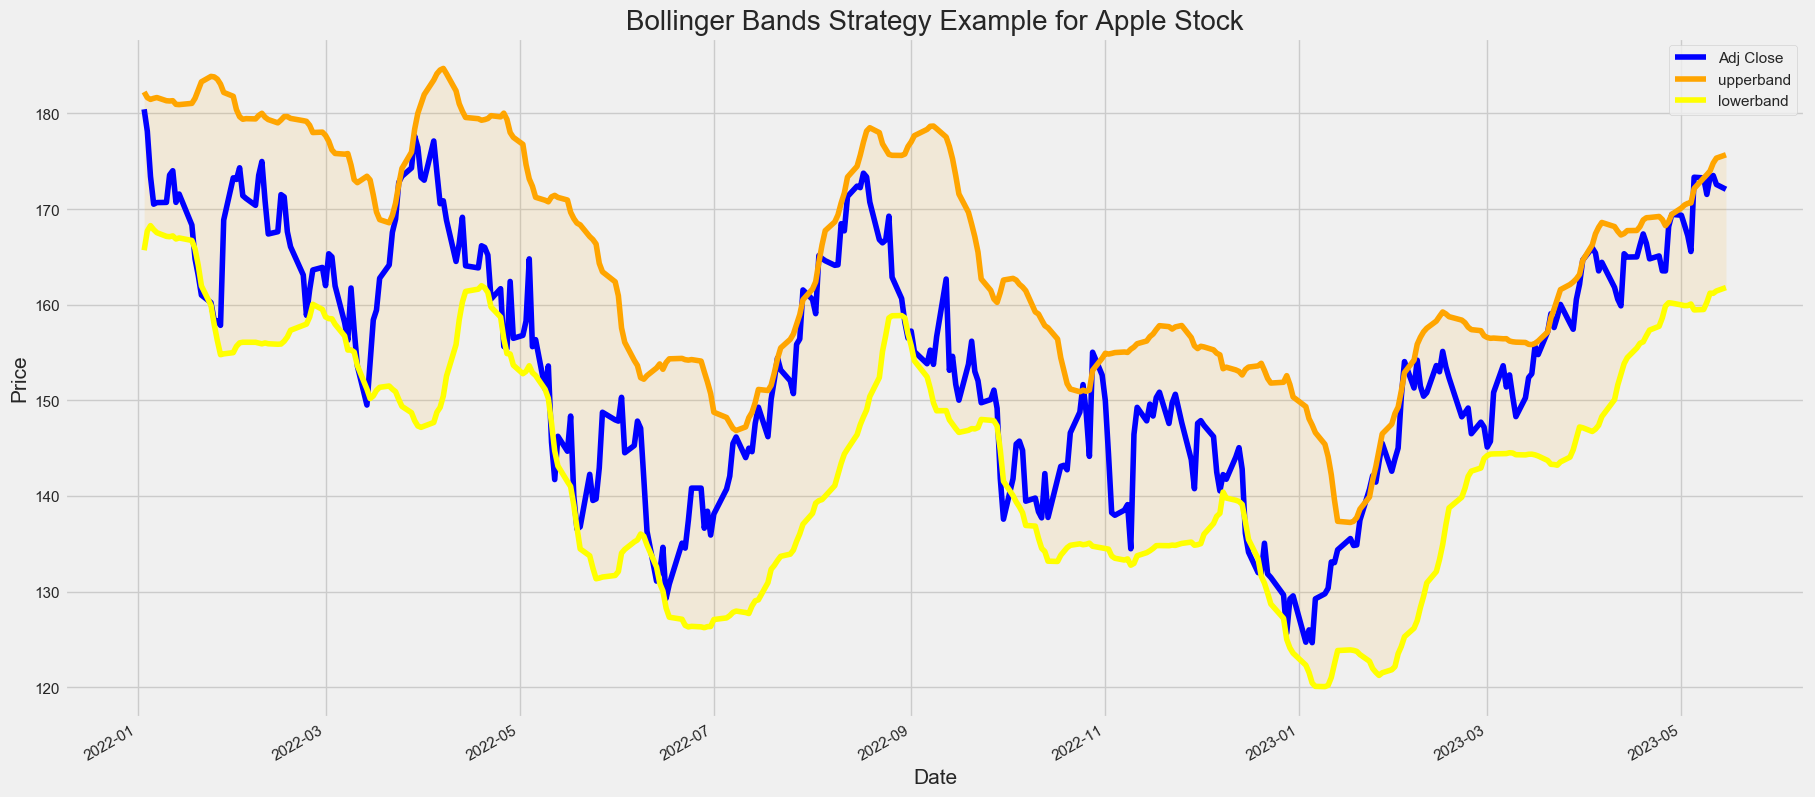

In [14]:
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt

aapl = stocks[stocks['ticker'] == 'AAPL']
aapl = aapl[aapl.index > '2022-01-01']
plt.figure(figsize = (20,10))

ax = aapl[['Adj Close', 'upperband', 'lowerband']].plot(color=['blue', 'orange', 'yellow'])
ax.fill_between(aapl.index, aapl['lowerband'], aapl['upperband'], facecolor='orange', alpha=0.1)
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Bollinger Bands Strategy Example for Apple Stock', fontsize = 20)
plt.show()

In [15]:
stocks.head(10)

,Open,High,Low,Close,Adj Close,Volume,ticker,returns,SMA_10,SMA_30,...,MACD_Signal_Action,MACD_Signal_Position,MACD_Returns,SMA_20,SD_20,upperband,lowerband,Bollinger_Signal_Action,Bollinger_Signal_Position,Bollinger_Returns
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-02,8.78,9.16,8.51,9.12,8.085549,8077100,ATVI,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2009-01-05,9.00,9.07,8.62,8.75,7.757518,8074400,ATVI,-0.040570,NaN,NaN,...,1.0,1.0,-0.065143,NaN,NaN,NaN,NaN,0.0,0.0,-0.0
2009-01-06,8.81,8.89,8.14,8.18,7.252170,24157500,ATVI,-0.065143,NaN,NaN,...,1.0,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2009-01-07,8.20,9.42,8.18,9.08,8.050085,44055500,ATVI,0.110024,NaN,NaN,...,1.0,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2009-01-08,9.25,9.62,8.86,9.26,8.209670,22458800,ATVI,0.019824,NaN,NaN,...,1.0,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2009-01-09,9.25,9.46,9.06,9.26,8.209670,11596200,ATVI,0.000000,NaN,NaN,...,0.0,-1.0,0.017279,NaN,NaN,NaN,NaN,0.0,0.0,-0.0
2009-01-12,9.54,9.55,9.00,9.10,8.067819,7049800,ATVI,-0.017279,NaN,NaN,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2009-01-13,9.10,9.27,8.82,9.16,8.121012,13059000,ATVI,0.006593,NaN,NaN,...,0.0,0.0,-0.000000,NaN,NaN,NaN,NaN,0.0,0.0,-0.0
2009-01-14,9.19,9.25,8.80,9.06,8.032355,13515100,ATVI,-0.010917,NaN,NaN,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [16]:
sharpe_df = stocks[['ticker','SMA_Returns','SMA_Vol_Returns','Breakout_Returns','ATR_Returns','MACD_Returns','Bollinger_Returns']]

In [17]:
sharpe_df

,ticker,SMA_Returns,SMA_Vol_Returns,Breakout_Returns,ATR_Returns,MACD_Returns,Bollinger_Returns
Date,,,,,,,
2009-01-02,ATVI,-0.000000,-0.000000,NaN,-0.000000,NaN,NaN
2009-01-05,ATVI,-0.000000,-0.000000,-0.0,-0.000000,-0.065143,-0.0
2009-01-06,ATVI,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2009-01-07,ATVI,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2009-01-08,ATVI,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...
2023-05-09,ZS,-0.061293,0.061293,0.0,0.061293,0.000000,0.0
2023-05-10,ZS,0.011730,-0.011730,-0.0,-0.011730,-0.000000,-0.0
2023-05-11,ZS,0.009444,-0.009444,-0.0,-0.009444,-0.000000,-0.0


In [18]:
import math
sharpe_sma = pd.DataFrame()
sharpe_sma = math.sqrt(260)* (sharpe_df.groupby('ticker')['SMA_Returns'].mean()/sharpe_df.groupby('ticker')['SMA_Returns'].std())

In [19]:
sharpe_sma = sharpe_sma.reset_index().set_index('ticker')
sharpe_sma.sort_values(by='SMA_Returns',ascending=False).head(10)

,SMA_Returns
ticker,
LCID,0.732075
ZM,0.686153
ALGN,0.615917
TSLA,0.521834
AAPL,0.438867
META,0.429302
NVDA,0.427322
CRWD,0.413651
CTAS,0.372295


In [20]:
sharpe_vol = pd.DataFrame()
sharpe_vol = math.sqrt(260)* (sharpe_df.groupby('ticker')['SMA_Vol_Returns'].mean()/sharpe_df.groupby('ticker')['SMA_Vol_Returns'].std())
sharpe_vol = sharpe_vol.reset_index().set_index('ticker')
sharpe_vol.sort_values(by='SMA_Vol_Returns',ascending=False).head(10)

,SMA_Vol_Returns
ticker,
CRWD,0.653545
KDP,0.624851
DDOG,0.620894
LULU,0.453113
GILD,0.445877
ZS,0.369031
ZM,0.353847
SNPS,0.317771
ORLY,0.316543


In [21]:
sharpe_bkt = pd.DataFrame()
sharpe_bkt = math.sqrt(260)* (sharpe_df.groupby('ticker')['Breakout_Returns'].mean()/sharpe_df.groupby('ticker')['Breakout_Returns'].std())
sharpe_bkt = sharpe_bkt.reset_index().set_index('ticker')
sharpe_bkt.sort_values(by='Breakout_Returns',ascending=False).head(10)

,Breakout_Returns
ticker,
LCID,1.180559
MRNA,1.047221
CEG,0.561083
AAPL,0.486139
AMD,0.402717
ENPH,0.362033
TSLA,0.346968
ZS,0.322349
ILMN,0.287104


In [22]:
sharpe_atr = pd.DataFrame()
sharpe_atr = math.sqrt(260)* (sharpe_df.groupby('ticker')['ATR_Returns'].mean()/sharpe_df.groupby('ticker')['ATR_Returns'].std())
sharpe_atr = sharpe_atr.reset_index().set_index('ticker')
sharpe_atr.sort_values(by='ATR_Returns',ascending=False).head(10)

,ATR_Returns
ticker,
GFS,1.339563
DDOG,0.674581
LULU,0.565697
CRWD,0.530863
RIVN,0.528853
PDD,0.502386
EA,0.399144
MRNA,0.383729
AMD,0.299999


In [23]:
sharpe_macd = pd.DataFrame()
sharpe_macd = math.sqrt(260)* (sharpe_df.groupby('ticker')['MACD_Returns'].mean()/sharpe_df.groupby('ticker')['MACD_Returns'].std())
sharpe_macd = sharpe_macd.reset_index().set_index('ticker')
sharpe_macd.sort_values(by='MACD_Returns',ascending=False).head(10)

,MACD_Returns
ticker,
PDD,0.940729
FTNT,0.583224
AVGO,0.536943
ROST,0.493650
VRSK,0.464676
ADI,0.449607
TXN,0.427874
FISV,0.308207
BIIB,0.307497


In [24]:
sharpe_boll = pd.DataFrame()
sharpe_boll = math.sqrt(260)* (sharpe_df.groupby('ticker')['Bollinger_Returns'].mean()/sharpe_df.groupby('ticker')['Bollinger_Returns'].std())
sharpe_boll = sharpe_boll.reset_index().set_index('ticker')
sharpe_boll.sort_values(by='Bollinger_Returns',ascending=False).head(10)

,Bollinger_Returns
ticker,
ASML,0.915244
FISV,0.758290
ZM,0.708058
ISRG,0.696902
BKR,0.672689
INTU,0.664586
NVDA,0.632250
CTAS,0.631951
AMAT,0.602528


In [25]:
sharpe_all = pd.concat([sharpe_sma,sharpe_vol,sharpe_bkt,sharpe_atr,sharpe_macd,sharpe_boll],axis=1,sort=False).reset_index()
sharpe_all.rename(columns = {'index':'ticker'})

,ticker,SMA_Returns,SMA_Vol_Returns,Breakout_Returns,ATR_Returns,MACD_Returns,Bollinger_Returns
0,AAPL,0.438867,-0.157716,0.486139,0.078651,-0.113418,-0.055087
1,ABNB,-0.481989,-0.431937,-0.101231,-0.007506,-0.217061,0.233620
2,ADBE,-0.032781,-0.262695,-0.714639,-0.250810,-0.014317,0.567942
3,ADI,-0.317762,-0.263256,-0.802719,-0.183270,0.449607,0.409315
4,ADP,0.154836,-0.000747,-0.277249,-0.275334,0.247144,0.562452
...,...,...,...,...,...,...,...
96,WBD,-0.154907,-0.203734,-0.388413,-0.272830,-0.250845,0.191385
97,WDAY,-0.160120,-0.726286,-0.521981,-0.333180,-0.072236,-0.051740
98,XEL,0.128032,-0.128743,-0.419906,-0.324031,0.035134,0.286914
99,ZM,0.686153,0.353847,0.173826,-0.201949,-0.542682,0.708058
